In [1]:
#|export
from fastai.vision.all import *
import gradio as gr

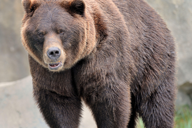

In [2]:

im = PILImage.create("bear.jpg")
im.thumbnail((192,192))
im

In [3]:
#|export
learn = load_learner("types_of_bear.pkl")
learn

In [4]:

%time learn.predict(im) #%time to get time to execute

CPU times: user 397 ms, sys: 665 ms, total: 1.06 s
Wall time: 1.01 s


('grizzly', tensor(1), tensor([0.0046, 0.9850, 0.0018, 0.0087]))

In [5]:
#|export
categories = {"polar", "grizzly", "black", "red"}

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [6]:
#|export
classify_image(im) # as gradio doesnt understand tensors as returned by the model we convert it to float values 

{'polar': 0.004587975796312094,
 'grizzly': 0.9850093126296997,
 'red': 0.0017501941183581948,
 'black': 0.008652633056044579}

## working with gradio now

In [7]:
#|export
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ["polar.jpg", "grizzly.jpg", "black.jpg", "red.jpg", "dunno.jpg"]

intf = gr.Interface(fn=classify_image, inputs= image, outputs=label, examples=examples)
intf.launch(inline=False, share=True) # share true to get a hosted link for 72hrs

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://34b99571d0df41861b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
